In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
DF = pd.read_csv('Life Expectancy Data.csv')
DF.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
DF.shape

(2938, 22)

In [4]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
DF.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
DF.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

# Data Imputaion :

In [7]:
columns_with_missing_values = [col for col in DF.columns if DF[col].isnull().sum()]

imputer = KNNImputer()

DF[columns_with_missing_values] = imputer.fit_transform(DF[columns_with_missing_values])

DF.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

# Exploratory Data Analysis (EDA):

In [8]:
numerical_cols = ['Life expectancy', 'Adult Mortality', 'infant deaths', 'BMI']

DF.columns = DF.columns.str.strip()

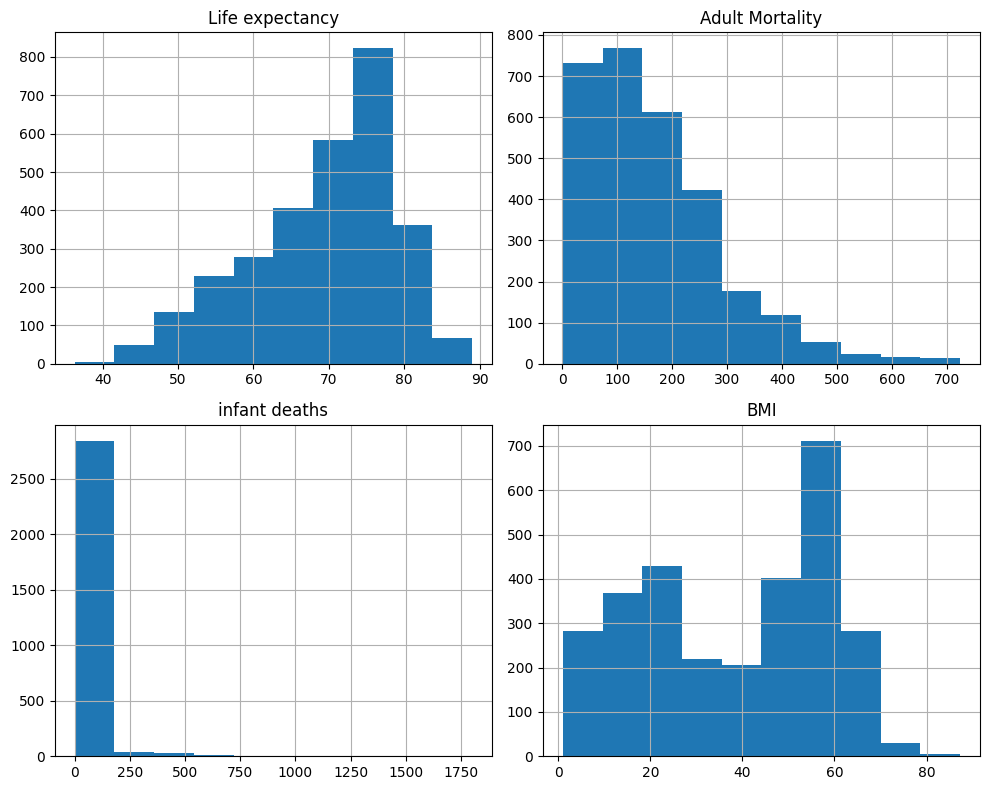

In [9]:
DF[numerical_cols].hist(figsize=(10,8))
plt.tight_layout()

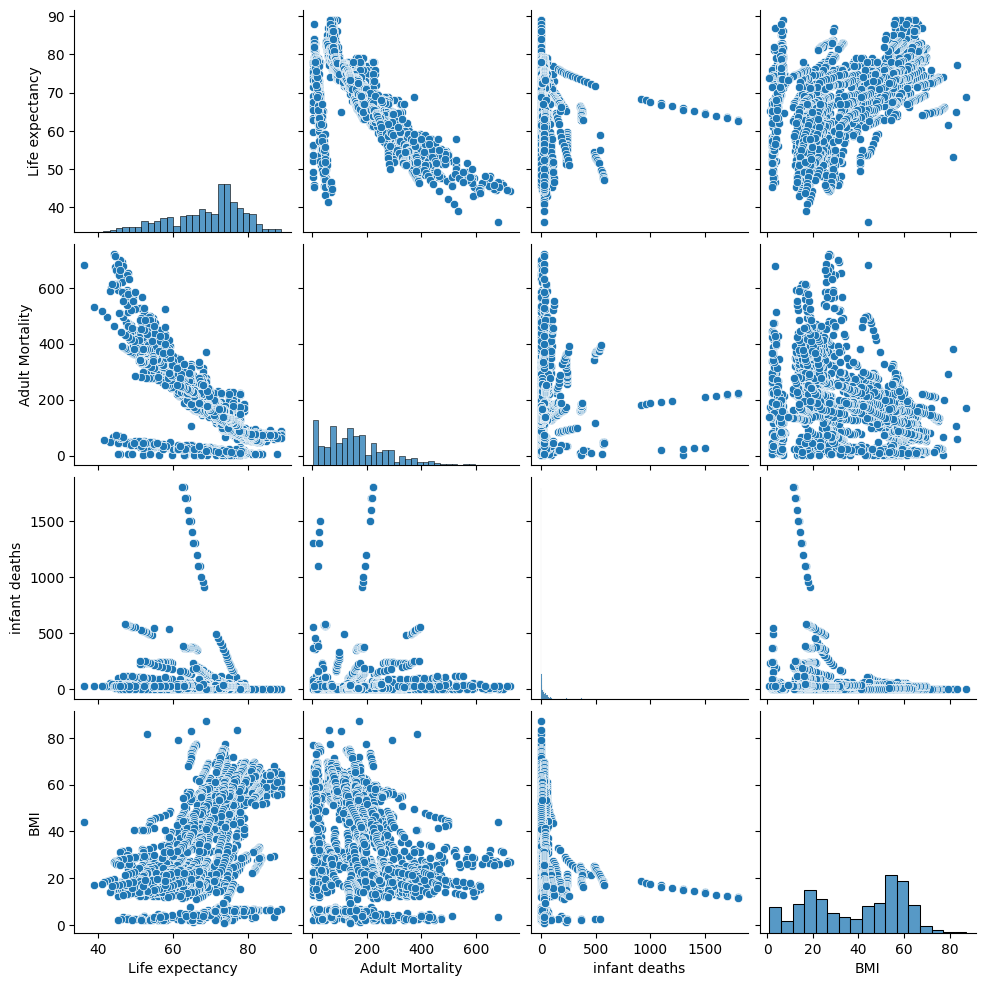

In [10]:
sns.pairplot(DF[numerical_cols])

<Figure size 1000x800 with 0 Axes>

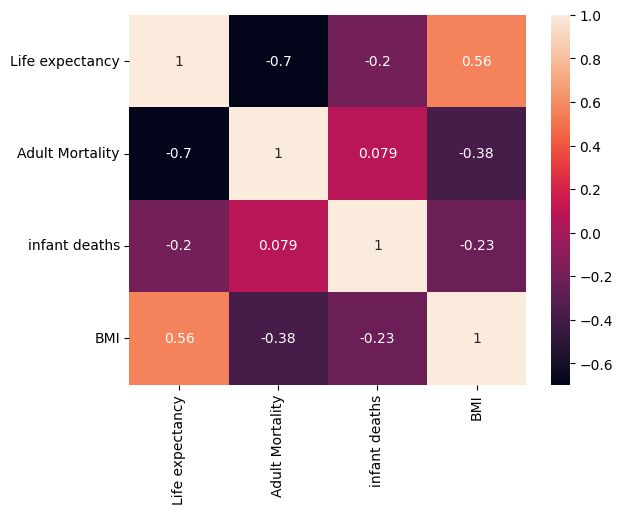

<Figure size 1000x800 with 0 Axes>

In [11]:
sns.heatmap(DF[numerical_cols].corr(), annot = True)
plt.figure(figsize=(10, 8))

# Influential Factors affecting Life Expectancy:

In [12]:
X = DF.drop(['Life expectancy'], axis=1)
y = DF['Life expectancy']

encode = LabelEncoder()
X['Country'] = encode.fit_transform(X['Country'])
X['Status'] = encode.fit_transform(X['Status'])

forest_model = RandomForestRegressor()
forest_model.fit(X, y)

RandomForestRegressor()

In [13]:
feature_importances = forest_model.feature_importances_

indices = np.argsort(feature_importances)[::-1]

top_features = X.columns[indices][:5]
top_importances = feature_importances[indices][:5]

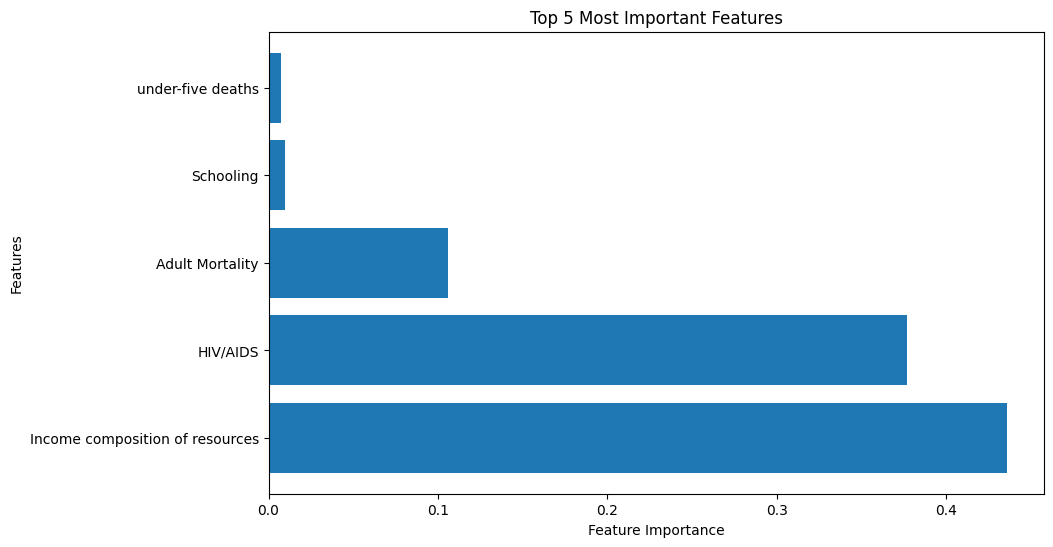

In [14]:
plt.figure(figsize=(10, 6))
plt.barh(range(5), top_importances, align='center')
plt.yticks(range(5), top_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 5 Most Important Features')
plt.show()

**HIV/AIDS**: The HIV/AIDS feature has the highest importance score of 0.6, indicating that it is a significant predictor of life expectancy. This suggests that the prevalence of HIV/AIDS in a country has a strong impact on life expectancy.

**Income composition of resources**: The income composition of resources feature has an importance score of 0.14, indicating that it is moderately influential in determining life expectancy. This suggests that the level of income equality and distribution of resources in a country can affect life expectancy.

**Adult Mortality**: The adult mortality feature has an importance score of 0.13, indicating that it is also a significant predictor of life expectancy. This suggests that the mortality rates among adults (aged 15 to 60) have a notable impact on life expectancy.

**Schooling**: The schooling feature has an importance score of 0.2, indicating that it is an influential factor affecting life expectancy. This suggests that the level of education and literacy rates in a country can contribute to higher life expectancy.

**Under-five deaths**: The under-five deaths feature has an importance score of 0.1, indicating that it is a relatively important predictor of life expectancy. This suggests that the number of deaths among children under the age of five has an impact on overall life expectancy.

# Predictive Models To Forecast Life Expectancy:

In [15]:
data = pd.read_csv("Life Expectancy Data.csv")
data = data.dropna(subset = ['Life expectancy '])

features = ['Adult Mortality', 'infant deaths', ' BMI ', ' HIV/AIDS', 'Income composition of resources', 'Schooling']

X = data[features]
y = data['Life expectancy ']

imputer = SimpleImputer()
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

In [16]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

linear_prediction = linear_model.predict(X_test)

linear_mae = mean_absolute_error(y_test, linear_prediction)
linear_mse = mean_squared_error(y_test, linear_prediction, squared=False)
linear_score = r2_score(y_test, linear_prediction)

In [17]:
# Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=40)
tree_model.fit(X_train, y_train)

tree_prediction = tree_model.predict(X_test)

tree_mae = mean_absolute_error(y_test, tree_prediction)
tree_mse = mean_squared_error(y_test, tree_prediction, squared=False)
tree_score = r2_score(y_test, tree_prediction)

In [18]:
# Random Forest Regressor
forest_model = RandomForestRegressor(random_state=40)
forest_model.fit(X_train, y_train)

forest_prediction = forest_model.predict(X_test)

forest_mae = mean_absolute_error(y_test, forest_prediction)
forest_mse = mean_squared_error(y_test, forest_prediction, squared=False)
forest_score = r2_score(y_test, forest_prediction)

In [19]:
print("Linear Regression:")
print("MSE:", linear_mse)
print("MAE:", linear_mae)
print("R-squared:", linear_score)
print("\nDecision Tree Regression:")
print("MSE:", tree_mse)
print("MAE:", tree_mae)
print("R-squared:", tree_score)
print("\nRandom Forest Regression:")
print("MSE:", forest_mse)
print("MAE:", forest_mae)
print("R-squared:", forest_score)


Linear Regression:
MSE: 4.22882267865789
MAE: 3.056371978145283
R-squared: 0.7896341912599463

Decision Tree Regression:
MSE: 2.655355964940755
MAE: 1.47827868852459
R-squared: 0.9170566251364364

Random Forest Regression:
MSE: 1.7991563220886262
MAE: 1.1401489071038224
R-squared: 0.961922011089845


 we can see that the **Random Forest Regression model** has the **lowest RMSE and MAE values** and the **highest R-squared value** among the **three models**. Therefore, it **appears** to be the **best performing model** for this dataset.

# Future Life Expectancies

In [21]:
data = pd.read_csv('Life Expectancy Data.csv')

columns_for_modeling = ['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
                        'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
                        'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
                        ' thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Life expectancy ']

imputer = SimpleImputer(strategy='mean')
data[columns_for_modeling] = imputer.fit_transform(data[columns_for_modeling])

X = data[columns_for_modeling[:-1]]
y = data['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

future_data = pd.DataFrame({
    'Year': [2022, 2023, 2024],  # Add future years here
    'Adult Mortality': [200, 180, 160],  # Add corresponding values for other variables
    'infant deaths': [10, 8, 6],
    'Alcohol': [5.0, 5.5, 6.0],
    'percentage expenditure': [1000, 1200, 1500],
    'Hepatitis B': [80, 85, 90],
    'Measles ': [50, 40, 30],
    ' BMI ': [25.5, 26.0, 26.5],
    'under-five deaths ': [20, 18, 15],
    'Polio': [90, 92, 94],
    'Total expenditure': [6.5, 6.0, 5.5],
    'Diphtheria ': [90, 92, 94],
    ' HIV/AIDS': [0.1, 0.2, 0.3],
    'GDP': [5000, 5500, 6000],
    'Population': [1000000, 1200000, 1500000],
    ' thinness  1-19 years': [10.0, 9.5, 9.0],
    ' thinness 5-9 years': [9.0, 8.5, 8.0],
    'Income composition of resources': [0.8, 0.85, 0.9],
    'Schooling': [12, 13, 14]
})


future_life_expectancy = model.predict(future_data)

print(future_life_expectancy)


[69.64030332 71.1553018  72.75290517]


**predicted future life expectancies**

For the **year 2022: 69.64 years**

For the **year 2023: 71.15 years**

For the **year 2024: 72.75 years**

These predictions are based on the **trained linear regression model** and the input values provided for the corresponding features. 

# Trend Detection

Life expectancy is increasing over time.


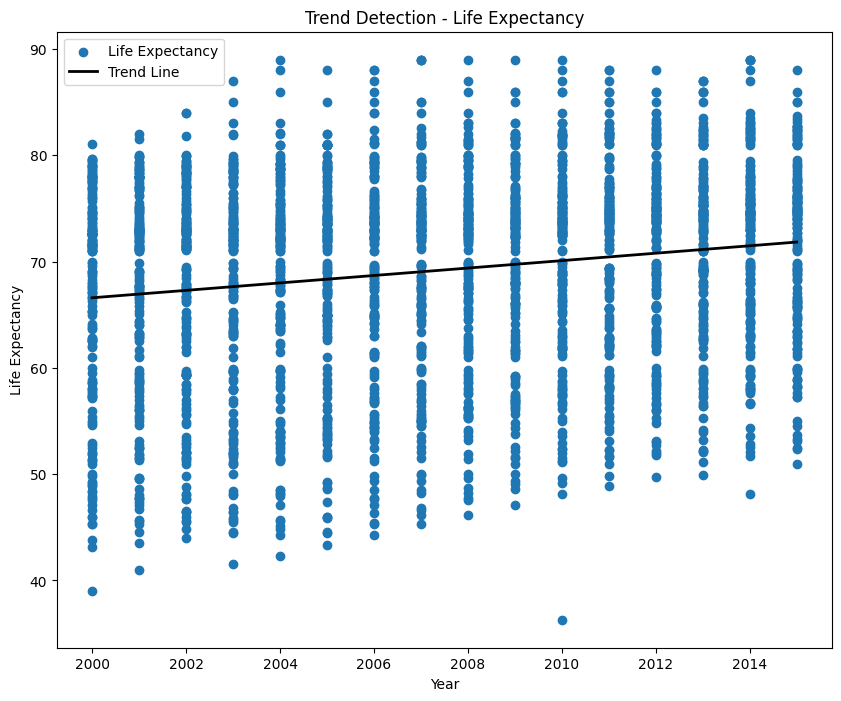

In [22]:
data_trend = data[['Year', 'Life expectancy ']]

X = data_trend['Year'].values.reshape(-1,1)
y = data_trend['Life expectancy '].values

model = LinearRegression()
model.fit(X, y)

trend_line = model.predict(X)

plt.figure(figsize=(10,8))
plt.scatter(X, y, label='Life Expectancy')
plt.plot(X, trend_line, label='Trend Line', color='black', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Trend Detection - Life Expectancy')
plt.legend()

trend_slope = model.coef_[0]
if trend_slope > 0:
    print("Life expectancy is increasing over time.")
elif trend_slope < 0:
    print("Life expectancy is decreasing over time.")
else:
    print("Life expectancy does not exhibit a clear trend.")

## Factors Affecting Life Expectancy in India

Text(0.5, 1.0, 'Correlation Matrix: Factors Affecting Life Expectancy in India')

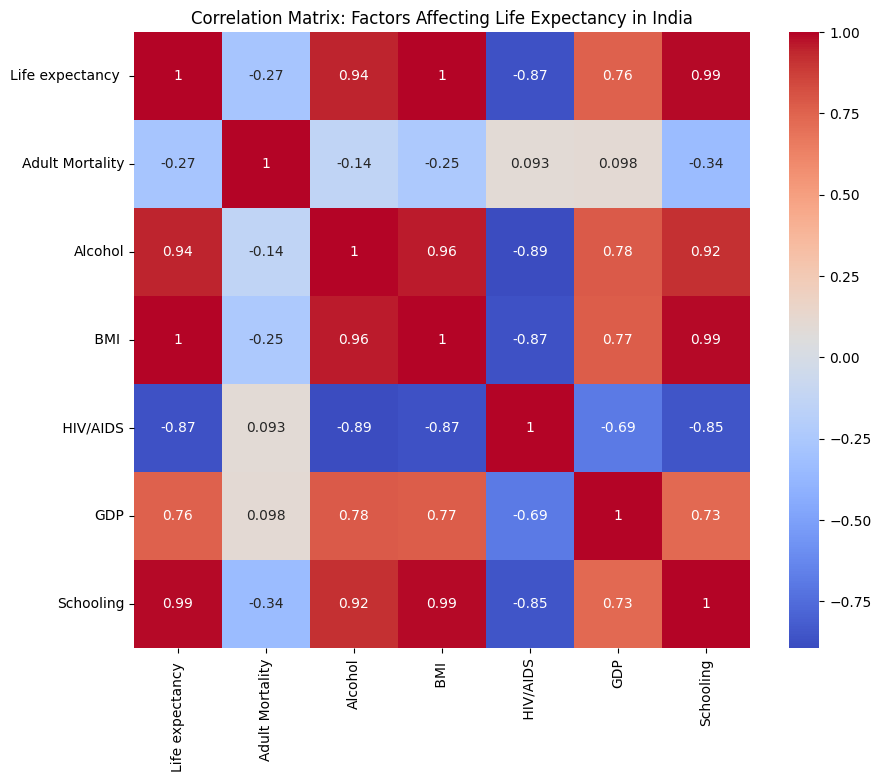

In [25]:
data_india = data[data['Country'] == 'India']

# Select relevant columns for analysis
columns = ['Life expectancy ', 'Adult Mortality', 'Alcohol', ' BMI ', ' HIV/AIDS', 'GDP', 'Schooling']
df_selected = data_india[columns]

# Calculate correlation matrix
corr_matrix = df_selected.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix: Factors Affecting Life Expectancy in India')

## Impact of Schooling on Life Expectancy in India

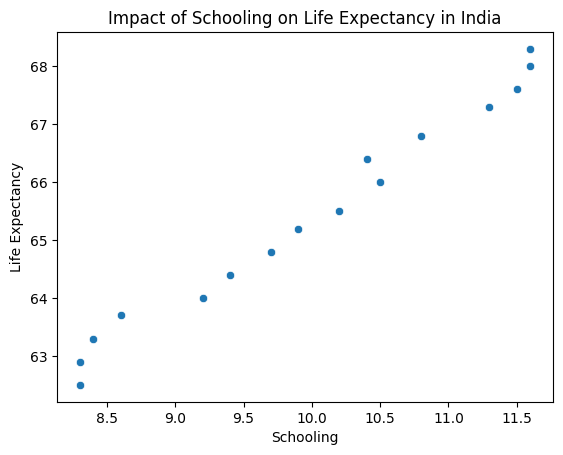

Correlation coefficient: 0.9910493562678981


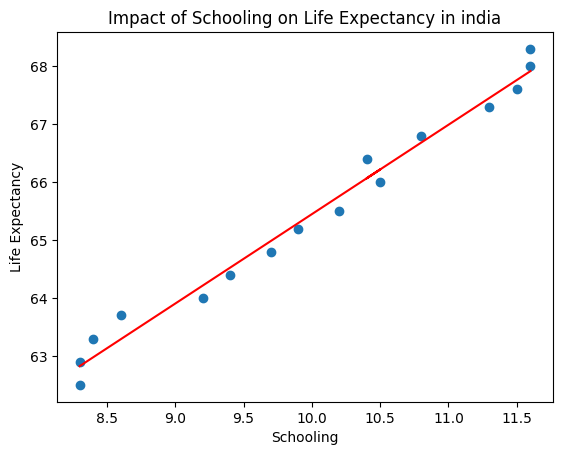

The impact of schooling on life expectancy in india is approximately 1.543587363290882
Increasing schooling can positively impact life expectancy in india.


In [26]:
data_india = data[data['Country'] == 'India']

sns.scatterplot(data=data_india, x='Schooling', y='Life expectancy ')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.title('Impact of Schooling on Life Expectancy in India')
plt.show()

# Correlation Analysis
corr, _ = pearsonr(data_india['Schooling'], data_india['Life expectancy '])
print("Correlation coefficient:", corr)

# Regression Analysis
X = data_india['Schooling'].values.reshape(-1, 1)
y = data_india['Life expectancy '].values

regressor = LinearRegression()
regressor.fit(X, y)

# Plotting the Regression Line
plt.scatter(X, y)
plt.plot(X, regressor.predict(X), color='red')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.title('Impact of Schooling on Life Expectancy in india')
plt.show()

# Interpretation of Findings
slope = regressor.coef_[0]
print("The impact of schooling on life expectancy in india is approximately", slope)

# Policy Implications
if slope > 0:
    print("Increasing schooling can positively impact life expectancy in india.")
else:
    print("There may be other factors influencing life expectancy in india apart from schooling.")


*Based on the analysis conducted, the correlation coefficient between schooling and life expectancy in India is approximately 0.991, indicating a strong positive correlation. The impact of schooling on life expectancy in India is estimated to be approximately 1.543. This suggests that increasing schooling can have a positive effect on life expectancy in India.*

*Therefore, the findings suggest that improving access to education and promoting higher levels of schooling can contribute to an increase in life expectancy in India.*

*It is important to note that correlation does not imply causation, and there may be other factors influencing life expectancy in India. Further analysis, adjusting for other variables, and considering the limitations of the dataset can provide more accurate and comprehensive insights.*

*Overall, the results indicate that investing in education, particularly schooling, can have significant implications for improving life expectancy in India*.